In [1]:
import sys
sys.path.append('/home/g/Desktop/git/nodules/src/')

import candidates as cd
import candgen as luna
import segutil as util

import os
import math
import copy
import time
import scipy
import random
import skimage.feature
import scipy.ndimage
import scipy.misc as scipy_misc
import scipy.ndimage.morphology as morphology
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import SimpleITK as sitk

from glob import glob
from skimage import measure
from skimage import feature

SAMPLES_PATH = '/scr/nodules/luna/val/subset0/'
SAMPLE_CANDIDATES_PATH = '/home/g/Desktop/git/nodules/resources/annotations.csv'

In [2]:
time1 = time.time()
#for parent, subdir, files in os.walk(SAMPLES_PATH):
path = SAMPLES_PATH
filelist = glob(path+'/*.mhd')
filepathlist = copy.deepcopy(filelist)
templist = []
for f in filelist:
  f = f.split('/')
  f = f[-1]
  templist.append(f[:-4])
filelist = templist

In [3]:
no = 9
print filelist[no]
candlist = pd.read_csv(SAMPLE_CANDIDATES_PATH)
currentNodules = candlist[candlist['seriesuid'] == filelist[no]]
print currentNodules[['coordX','coordY','coordZ']]

1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748
        coordX     coordY      coordZ
335  67.194343  63.998022 -246.110624
336  94.635117 -17.372059 -204.396127


In [4]:
itk = sitk.ReadImage(filepathlist[no])
origin = np.array(itk.GetOrigin())
spacing = np.array(itk.GetSpacing())

In [7]:
image, _ = luna.loadItk(filepathlist[no],None)

In [8]:
segmentation = cd.segmentLung(image)
mask = cd.applyMask(image, segmentation)
segmentedImage = copy.deepcopy(image)
minimum = np.min(image)
segmentedImage[mask==0] = 0#minimum

SEGMENTING LUNG VOLUME ..
APPLYING MASK


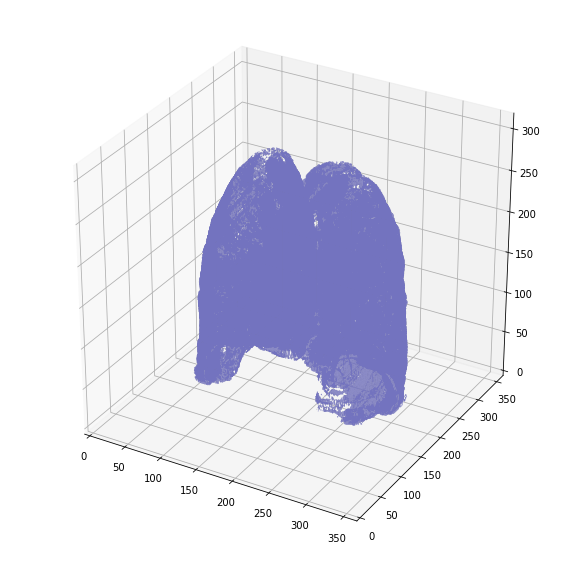

In [9]:
cd.plot3d(segmentedImage,0)

In [12]:
def findROI(image):
  sums = 0
  zmin = 0
  zmax = image.shape[0] - 1
  while sums == 0:
    sumMax = np.sum(image[zmax,:,:])
    sumMin = np.sum(image[zmin,:,:])
    if sumMax == 0:
      zmax -= 1
    if sumMin == 0:
      zmin += 1
    sums = sumMax*sumMin
  sums = 0
  xmin = 0
  xmax = image.shape[1] - 1
  while sums == 0:
    sumMax = np.sum(image[:,xmax,:])
    sumMin = np.sum(image[:,xmin,:])
    if sumMax == 0:
      xmax -= 1
    if sumMin == 0:
      xmin += 1
    sums = sumMax*sumMin
  sums = 0
  ymin = 0
  ymax = image.shape[2] - 1
  while sums == 0:
    sumMax = np.sum(image[:,:,ymax])
    sumMin = np.sum(image[:,:,ymin])
    if sumMax == 0:
      ymax -= 1
    if sumMin == 0:
      ymin += 1
    sums = sumMax*sumMin
  return zmin,zmax,xmin,xmax,ymin,ymax

In [15]:
def crop(image):
  zmin,zmax,xmin,xmax,ymin,ymax = findROI(image)
  croppedImage = image[zmin:zmax,xmin:xmax,ymin:ymax]
  return croppedImage

In [16]:
zmin,zmax,ymin,ymax,xmin,xmax = findROI(segmentedImage)
roi = crop(segmentedImage)

In [14]:
print str(zmin)+' '+str(zmax)+' '+str(ymin)+' '+str(ymax)+' '+str(xmin)+' '+str(xmax)

13 306 94 284 50 314


In [17]:
print roi.shape

(293, 190, 264)
